In [26]:
import numpy as np
import pandas as pd

In [ ]:
data_dir = '/data/dli-data' # '../data'

In [28]:
data = pd.read_pickle(f'{data_dir}/sdd/raw/df_varfs.pkl')

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

by scene

In [32]:
data.head()

,metaId,label,sceneId,scene,avg_vel,max_vel,avg_acc,max_acc,min_acc,abs+avg_acc,...,min_acc_com,abs+avg_acc_com,abs+max_acc_com,min_dist_com,avg_den100_com,tot_den100_com,avg_den50_com,tot_den50_com,avg_den10_com,tot_den10_com
0,0,Biker,bookstore_0,bookstore,2.986981,3.064129,-0.001665,0.009037,-0.009037,0.005102,...,-0.076918,0.025966,0.127397,66.319303,0.50,10,0.00,0,0.0,0
1,1,Biker,bookstore_0,bookstore,3.914014,4.192627,0.000636,0.036924,-0.024498,0.018103,...,-0.084885,0.022929,0.084885,44.553339,0.15,3,0.05,1,0.0,0
2,2,Pedestrian,bookstore_0,bookstore,0.960907,1.185122,-0.015303,0.014277,-0.071084,0.021017,...,-0.071084,0.011697,0.071084,23.706539,0.20,4,0.10,2,0.0,0
3,3,Pedestrian,bookstore_0,bookstore,0.198828,0.333333,-0.001157,0.013889,-0.013889,0.009726,...,-0.020833,0.011476,0.023508,18.248288,3.10,62,1.25,25,0.0,0
4,4,Pedestrian,bookstore_0,bookstore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029463,0.005900,0.029463,21.965883,5.15,103,1.20,24,0.0,0


In [39]:
factor = 'avg_vel'
scene_id = 'deathCircle_0'
d = data[(data.sceneId == scene_id) & ((data.label == 'Biker') | (data.label == 'Car'))]
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(d, x=factor, stat='probability', hue='label', binwidth=0.2, ax=axes[0])
axes[0].set_title(f'{scene_id}: {d.shape[0]}')
sns.histplot(d[(d.label=='Biker')], x=factor, stat='probability', binwidth=0.2, ax=axes[1])
axes[1].set_title(f'{scene_id}: {d[(d.label == "Biker")].shape[0]} (Biker)')
sns.histplot(d[d.label=='Car'], x=factor, stat='probability', binwidth=0.2, ax=axes[2])
axes[2].set_title(f'{scene_id}: {d[d.label == "Car"].shape[0]} (Car)')
plt.savefig(f'../figures/agent_distribution/{factor}/{scene_id}_biker_car.png')
plt.close()


In [40]:
factor = 'avg_vel'
scene_id = 'deathCircle_1'
d = data[(data.sceneId == scene_id) & ((data.label == 'Biker') | (data.label == 'Car'))]
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(d, x=factor, stat='probability', hue='label', binwidth=0.2, ax=axes[0])
axes[0].set_title(f'{scene_id}: {d.shape[0]}')
sns.histplot(d[(d.label=='Biker')], x=factor, stat='probability', binwidth=0.2, ax=axes[1])
axes[1].set_title(f'{scene_id}: {d[(d.label == "Biker")].shape[0]} (Biker)')
sns.histplot(d[d.label=='Car'], x=factor, stat='probability', binwidth=0.2, ax=axes[2])
axes[2].set_title(f'{scene_id}: {d[d.label == "Car"].shape[0]} (Car)')
plt.savefig(f'../figures/agent_distribution/{factor}/{scene_id}_biker_car.png')
plt.close()


In [41]:
factor = 'avg_vel'
scene_id = 'deathCircle_01'
d = data[((data.sceneId == 'deathCircle_0') | (data.sceneId == 'deathCircle_1')) & ((data.label == 'Biker') | (data.label == 'Car'))]
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(d, x=factor, stat='probability', hue='label', binwidth=0.2, ax=axes[0])
axes[0].set_title(f'{scene_id}: {d.shape[0]}')
sns.histplot(d[(d.label=='Biker')], x=factor, stat='probability', binwidth=0.2, ax=axes[1])
axes[1].set_title(f'{scene_id}: {d[(d.label == "Biker")].shape[0]} (Biker)')
sns.histplot(d[d.label=='Car'], x=factor, stat='probability', binwidth=0.2, ax=axes[2])
axes[2].set_title(f'{scene_id}: {d[d.label == "Car"].shape[0]} (Car)')
plt.savefig(f'../figures/agent_distribution/{factor}/{scene_id}_biker_car.png')
plt.close()


by agent

In [25]:
factor = 'avg_vel'
for scene_id in data.sceneId.unique():
    if 'hyang' in scene_id or 'deathCircle' in scene_id:
        for label in ['Pedestrian', 'Biker']:
            d = data[(data.sceneId == scene_id) & (data.label == label)][[factor]]
            if d.shape[0] > 10:
                print(scene_id, label, d.shape)
                plt.figure()
                sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
                plt.title(f'{scene_id}: {d.shape[0]}')
                plt.savefig(f'../figures/agent_distribution/{factor}/{label}_{scene_id}.png')
                plt.close()

deathCircle_0 Pedestrian (598, 1)
deathCircle_0 Biker (666, 1)
deathCircle_1 Pedestrian (755, 1)
deathCircle_1 Biker (638, 1)
deathCircle_2 Pedestrian (14, 1)
deathCircle_3 Pedestrian (395, 1)
deathCircle_3 Biker (679, 1)
deathCircle_4 Biker (18, 1)
hyang_0 Pedestrian (594, 1)
hyang_0 Biker (239, 1)
hyang_1 Pedestrian (422, 1)
hyang_1 Biker (72, 1)
hyang_10 Pedestrian (209, 1)
hyang_10 Biker (23, 1)
hyang_11 Pedestrian (342, 1)
hyang_11 Biker (17, 1)
hyang_12 Pedestrian (91, 1)
hyang_12 Biker (35, 1)
hyang_13 Pedestrian (59, 1)
hyang_14 Pedestrian (70, 1)
hyang_2 Pedestrian (496, 1)
hyang_2 Biker (134, 1)
hyang_3 Pedestrian (402, 1)
hyang_3 Biker (70, 1)
hyang_4 Pedestrian (988, 1)
hyang_4 Biker (330, 1)
hyang_5 Pedestrian (380, 1)
hyang_5 Biker (66, 1)
hyang_6 Pedestrian (311, 1)
hyang_6 Biker (39, 1)
hyang_7 Pedestrian (42, 1)
hyang_8 Pedestrian (11, 1)


In [26]:
factor = 'avg_vel'
label = 'Biker'
scene_id = 'deathCircle_013'
d = data[((data.sceneId == 'deathCircle_0') | (data.sceneId == 'deathCircle_1') | (data.sceneId == 'deathCircle_3')) & (data.label == label)][[factor]]
plt.figure()
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'{scene_id}: {d.shape[0]}')
plt.savefig(f'../figures/agent_distribution/{factor}/{label}_{scene_id}.png')
plt.close()

In [27]:
factor = 'avg_vel'
label = 'Pedestrian'
scene_id = 'deathCircle_013'
d = data[((data.sceneId == 'deathCircle_0') | (data.sceneId == 'deathCircle_1') | (data.sceneId == 'deathCircle_3')) & (data.label == label)][[factor]]
plt.figure()
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'{scene_id}: {d.shape[0]}')
plt.savefig(f'../figures/agent_distribution/{factor}/{label}_{scene_id}.png')
plt.close()

In [28]:
factor = 'avg_vel'
label = 'Biker'
scene_id = 'hyang_0145'
d = data[((data.sceneId == 'hyang_0') | (data.sceneId == 'hyang_1') | (data.sceneId == 'hyang_4') | (data.sceneId == 'hyang_5')) & (data.label == label)][[factor]]
plt.figure()
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'{scene_id}: {d.shape[0]}')
plt.savefig(f'../figures/agent_distribution/{factor}/{label}_{scene_id}.png')
plt.close()

In [29]:
factor = 'avg_vel'
label = 'Pedestrian'
scene_id = 'hyang_0145'
d = data[((data.sceneId == 'hyang_0') | (data.sceneId == 'hyang_1') | (data.sceneId == 'hyang_4') | (data.sceneId == 'hyang_5')) & (data.label == label)][[factor]]
plt.figure()
sns.histplot(d, x=factor, stat='probability', binwidth=0.2)
plt.title(f'{scene_id}: {d.shape[0]}')
plt.savefig(f'../figures/agent_distribution/{factor}/{label}_{scene_id}.png')
plt.close()

In [22]:
data.columns

Index(['metaId', 'label', 'sceneId', 'scene', 'avg_vel', 'max_vel', 'avg_acc',
       'max_acc', 'min_acc', 'abs+avg_acc', 'abs+max_acc', 'min_dist',
       'avg_den100', 'tot_den100', 'avg_den50', 'tot_den50', 'avg_den10',
       'tot_den10', 'avg_vel_com', 'max_vel_com', 'avg_acc_com', 'max_acc_com',
       'min_acc_com', 'abs+avg_acc_com', 'abs+max_acc_com', 'min_dist_com',
       'avg_den100_com', 'tot_den100_com', 'avg_den50_com', 'tot_den50_com',
       'avg_den10_com', 'tot_den10_com'],
      dtype='object')

Split groups

In [30]:
factor = 'avg_vel'
label = 'Biker'
scene_id = 'deathCircle_013'
data_dc013_biker = data[((data.sceneId == 'deathCircle_0') | (data.sceneId == 'deathCircle_1') | (data.sceneId == 'deathCircle_3')) & (data.label == label)][[factor]]


In [31]:
factor = 'avg_vel'
label = 'Pedestrian'
scene_id = 'hyang_0145'
data_hyang0145_ped = data[((data.sceneId == 'hyang_0') | (data.sceneId == 'hyang_1') | (data.sceneId == 'hyang_4') | (data.sceneId == 'hyang_5')) & (data.label == label)][[factor]]

In [48]:
print(f"0 < avg_vel < 0.5 \t#={data_dc013_biker[(data_dc013_biker['avg_vel'] <= 0.5) & (data_dc013_biker['avg_vel'] > 0)].count()[0]}")
print(f"2 < avg_vel < 3 \t#={data_dc013_biker[(data_dc013_biker['avg_vel'] <= 3) & (data_dc013_biker['avg_vel'] > 2)].count()[0]}")
print(f"7.5 < avg_vel \t\t#={data_dc013_biker[(data_dc013_biker['avg_vel'] > 7.5)].count()[0]}")
low_bound = 0.5
for up_bound in [2, 2.25, 2.5, 2.75, 3, 3.5, 4]:
    print(f"{low_bound} < avg_vel < {up_bound} \t#={data_dc013_biker[(data_dc013_biker['avg_vel'] < up_bound) & (data_dc013_biker['avg_vel'] > low_bound)].count()[0]}")
up_bound = 7.5
for low_bound in [2, 2.25, 2.5, 2.75, 3, 3.5, 4]:
    print(f"{low_bound} < avg_vel < {up_bound} \t#={data_dc013_biker[(data_dc013_biker['avg_vel'] > low_bound) & (data_dc013_biker['avg_vel'] < up_bound)].count()[0]}")

0 < avg_vel < 0.5 	#=64
2 < avg_vel < 3 	#=606
7.5 < avg_vel 		#=9
0.5 < avg_vel < 2 	#=282
0.5 < avg_vel < 2.25 	#=388
0.5 < avg_vel < 2.5 	#=544
0.5 < avg_vel < 2.75 	#=710
0.5 < avg_vel < 3 	#=888
0.5 < avg_vel < 3.5 	#=1213
0.5 < avg_vel < 4 	#=1499
2 < avg_vel < 7.5 	#=1596
2.25 < avg_vel < 7.5 	#=1490
2.5 < avg_vel < 7.5 	#=1334
2.75 < avg_vel < 7.5 	#=1168
3 < avg_vel < 7.5 	#=990
3.5 < avg_vel < 7.5 	#=665
4 < avg_vel < 7.5 	#=379


In [49]:
print(f"0 < avg_vel < 0.5 \t#={data_hyang0145_ped[(data_hyang0145_ped['avg_vel'] <= 0.5) & (data_hyang0145_ped['avg_vel'] > 0)].count()[0]}")
print(f"2 < avg_vel < 3 \t#={data_hyang0145_ped[(data_hyang0145_ped['avg_vel'] <= 3) & (data_hyang0145_ped['avg_vel'] > 2)].count()[0]}")
print(f"3 < avg_vel \t\t#={data_hyang0145_ped[(data_hyang0145_ped['avg_vel'] > 3)].count()[0]}")
low_bound = 0.5
for up_bound in [0.75, 1, 1.25, 1.5, 2, 2.5, 3]:
    print(f"{low_bound} < avg_vel < {up_bound} \t#={data_hyang0145_ped[(data_hyang0145_ped['avg_vel'] < up_bound) & (data_hyang0145_ped['avg_vel'] > low_bound)].count()[0]}")
up_bound = 3
for low_bound in [0.75, 1, 1.25, 1.5, 2, 2.5, 3]:
    print(f"{low_bound} < avg_vel < {up_bound} \t#={data_hyang0145_ped[(data_hyang0145_ped['avg_vel'] > low_bound) & (data_hyang0145_ped['avg_vel'] < up_bound)].count()[0]}")

0 < avg_vel < 0.5 	#=429
2 < avg_vel < 3 	#=26
3 < avg_vel 		#=14
0.5 < avg_vel < 0.75 	#=305
0.5 < avg_vel < 1 	#=687
0.5 < avg_vel < 1.25 	#=1149
0.5 < avg_vel < 1.5 	#=1563
0.5 < avg_vel < 2 	#=1781
0.5 < avg_vel < 2.5 	#=1800
0.5 < avg_vel < 3 	#=1807
0.75 < avg_vel < 3 	#=1501
1 < avg_vel < 3 	#=1120
1.25 < avg_vel < 3 	#=657
1.5 < avg_vel < 3 	#=243
2 < avg_vel < 3 	#=26
2.5 < avg_vel < 3 	#=7
3 < avg_vel < 3 	#=0


### prepare car data

In [4]:
car = pd.read_pickle('/data/dli-data/sdd/filter/agent_type/Car.pkl')

In [12]:
scene_id = 'deathCircle_3'
pd.to_pickle(car[car.sceneId == scene_id], f'/data/dli-data/sdd/filter/agent_type/{scene_id}/Car.pkl')

## Merge data 

In [1]:
import pandas as pd

In [14]:
data_dir = '/data/dli-data' # '../data'

In [16]:
dc0_biker = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_0/Biker.pkl')
dc1_biker = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_1/Biker.pkl')
dc3_biker = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_3/Biker.pkl')
dc013_biker = pd.concat([dc0_biker, dc1_biker, dc3_biker], axis=0)
dc013_biker.to_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_013/Biker.pkl')

In [17]:
dc0_ped = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_0/Pedestrian.pkl')
dc1_ped = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_1/Pedestrian.pkl')
dc3_ped = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_3/Pedestrian.pkl')
dc013_ped = pd.concat([dc0_ped, dc1_ped, dc3_ped], axis=0)
dc013_ped.to_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_013/Pedestrian.pkl')

In [18]:
dc0_car = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_0/Car.pkl')
dc1_car = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_1/Car.pkl')
dc3_car = pd.read_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_3/Car.pkl')
dc013_car = pd.concat([dc0_car, dc1_car, dc3_car], axis=0)
dc013_car.to_pickle(f'{data_dir}/sdd/filter/agent_type/deathCircle_013/Car.pkl')

In [8]:
hyang0_ped = pd.read_pickle('../data/sdd/filter/agent_type/hyang_0/Pedestrian.pkl')
hyang1_ped = pd.read_pickle('../data/sdd/filter/agent_type/hyang_1/Pedestrian.pkl')
hyang4_ped = pd.read_pickle('../data/sdd/filter/agent_type/hyang_4/Pedestrian.pkl')
hyang5_ped = pd.read_pickle('../data/sdd/filter/agent_type/hyang_5/Pedestrian.pkl')
hyang0145_ped = pd.concat([hyang0_ped, hyang1_ped, hyang4_ped, hyang5_ped], axis=0)
hyang0145_ped.to_pickle('../data/sdd/filter/agent_type/hyang_0145/Pedestrian.pkl')

In [9]:
hyang0_biker = pd.read_pickle('../data/sdd/filter/agent_type/hyang_0/Biker.pkl')
hyang1_biker = pd.read_pickle('../data/sdd/filter/agent_type/hyang_1/Biker.pkl')
hyang4_biker = pd.read_pickle('../data/sdd/filter/agent_type/hyang_4/Biker.pkl')
hyang5_biker = pd.read_pickle('../data/sdd/filter/agent_type/hyang_5/Biker.pkl')
hyang0145_biker = pd.concat([hyang0_biker, hyang1_biker, hyang4_biker, hyang5_biker], axis=0)
hyang0145_biker.to_pickle('../data/sdd/filter/agent_type/hyang_0145/Biker.pkl')

## Visualize data 

In [22]:
image_path = '/data/dli-data/sdd/raw/annotations'

In [24]:
import os
import cv2
import pathlib
import matplotlib.pyplot as plt

def create_images_dict(unique_scene, image_path, image_file='reference.jpg', use_raw_data=False):
    images = {}
    for scene in unique_scene:
        if image_file == 'oracle.png':
            im = cv2.imread(os.path.join(image_path, scene, image_file), 0)
        else:
            if use_raw_data:
                scene_name, scene_idx = scene.split("_")
                im_path = os.path.join(
                    image_path, scene_name, f"video{scene_idx}", image_file)
            else:
                im_path = os.path.join(image_path, scene, image_file)
            im = cv2.imread(im_path)
        images[scene] = im
    # images channel: blue, green, red 
    return images
    
def plot_trajectories_scenes_overlay(image_path, df, agent_list, out_dir='../', format='png'):
    unique_scene = df.sceneId.unique()
    scene_images = create_images_dict(unique_scene, image_path, 'reference.jpg', True)
    colors = {
        'Pedestrian': 'blue', 'Biker': 'red', 'Car': 'green', 
        'Skater': 'orange', 'Bus': 'cyan', 'Cart': 'pink'}
    for scene_id in unique_scene:
        height, width = scene_images[scene_id].shape[0], scene_images[scene_id].shape[1]
        fig = plt.figure(figsize=(height/50, width/50))
        plt.imshow(scene_images[scene_id])
        ms, lw = 4, 3
        for agent in agent_list:
            scene_agent = df[(df.sceneId == scene_id) & (df.label == agent)]
            for _, traj in scene_agent.groupby('metaId'):
                if agent == 'Biker' or agent == 'Pedestrian':
                    plt.plot(traj.x, traj.y, '.-', c=colors[agent], ms=ms, linewidth=lw, alpha=0.5)
                else:
                    plt.plot(traj.x, traj.y, '.-', c=colors[agent], ms=ms, linewidth=lw)
            plt.plot(0, 0, '.-', c=colors[agent], alpha=0.5, label=agent)
        plt.legend()
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [57]:
def plot_trajectories_train_adapt(image_path, df_train, df_test, out_dir='../', format='png'):
    unique_scene = df_train.sceneId.unique()
    scene_images = create_images_dict(unique_scene, image_path, 'reference.jpg', True)
    
    for scene_id in unique_scene:
        height, width = scene_images[scene_id].shape[0], scene_images[scene_id].shape[1]
        fig = plt.figure(figsize=(height/50, width/50))
        plt.imshow(scene_images[scene_id])
        ms, lw = 4, 3

        # train
        scene_train = df_train[(df_train.sceneId == scene_id)]
        for _, traj in scene_train.groupby('metaId'):
            plt.plot(traj.x, traj.y, '.-', c='red', ms=ms, linewidth=lw, alpha=0.5)
        plt.plot(0, 0, '.-', c='red', alpha=0.5, label='train')
        # adapt 
        scene_adapt = df_test[(df_test.sceneId == scene_id)]
        for _, traj in scene_adapt.groupby('metaId'):
            plt.plot(traj.x, traj.y, '.-', c='blue', ms=ms, linewidth=lw, alpha=0.5)
        plt.plot(0, 0, '.-', c='blue', alpha=0.5, label='adaptation')

        plt.legend(fontsize=43)
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [20]:
dc013 = pd.concat([dc013_biker, dc013_car], axis=0)

In [25]:
plot_trajectories_scenes_overlay(image_path, dc013, ['Biker', 'Car'], out_dir='../figures/')

Saved ../figures/deathCircle_0.png
Saved ../figures/deathCircle_1.png
Saved ../figures/deathCircle_3.png


In [49]:
# high speed to low speed 
file = '2.75_7.5'
df_train = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/dc_013/Biker/{file}.pkl')
plot_trajectories_scenes_overlay(image_path, df_train, ['Biker'], out_dir=f'../figures/traj_check/vel_biker/{file}/')

file = '0.5_2.25'
df_adapt = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/dc_013/Biker/{file}.pkl')
plot_trajectories_scenes_overlay(image_path, df_adapt, ['Biker'], out_dir=f'../figures/traj_check/vel_biker/{file}/')

plot_trajectories_train_adapt(image_path, df_train, df_adapt, out_dir=f'../figures/traj_check/vel_biker/high2low/')

Saved ../figures/traj_check/vel_biker/2.75_7.5/deathCircle_0.png
Saved ../figures/traj_check/vel_biker/2.75_7.5/deathCircle_1.png
Saved ../figures/traj_check/vel_biker/2.75_7.5/deathCircle_3.png
Saved ../figures/traj_check/vel_biker/0.5_2.25/deathCircle_0.png
Saved ../figures/traj_check/vel_biker/0.5_2.25/deathCircle_1.png
Saved ../figures/traj_check/vel_biker/0.5_2.25/deathCircle_3.png


In [59]:
# low speed to high speed 
file = '0.5_3.5'
df_train = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/dc_013/Biker/{file}.pkl')
plot_trajectories_scenes_overlay(image_path, df_train, ['Biker'], out_dir=f'../figures/traj_check/vel_biker/{file}/')

file = '4_8'
df_adapt = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/dc_013/Biker/{file}.pkl')
plot_trajectories_scenes_overlay(image_path, df_adapt, ['Biker'], out_dir=f'../figures/traj_check/vel_biker/{file}/')

plot_trajectories_train_adapt(image_path, df_train, df_adapt, out_dir=f'../figures/traj_check/vel_biker/low2high/')

Saved ../figures/traj_check/vel_biker/0.5_3.5/deathCircle_0.png
Saved ../figures/traj_check/vel_biker/0.5_3.5/deathCircle_1.png
Saved ../figures/traj_check/vel_biker/0.5_3.5/deathCircle_3.png
Saved ../figures/traj_check/vel_biker/4_8/deathCircle_0.png
Saved ../figures/traj_check/vel_biker/4_8/deathCircle_1.png
Saved ../figures/traj_check/vel_biker/4_8/deathCircle_3.png
Saved ../figures/traj_check/vel_biker/low2high/deathCircle_0.png
Saved ../figures/traj_check/vel_biker/low2high/deathCircle_1.png
Saved ../figures/traj_check/vel_biker/low2high/deathCircle_3.png


In [60]:
# high speed to low speed 
file = '1_3'
df_train = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/hyang_0145/Pedestrian/{file}.pkl')
# plot_trajectories_scenes_overlay(image_path, df_train, ['Pedestrian'], out_dir=f'../figures/traj_check/vel_ped/{file}/')

file = '0.25_0.7'
df_adapt = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/hyang_0145/Pedestrian/{file}.pkl')
# plot_trajectories_scenes_overlay(image_path, df_adapt, ['Pedestrian'], out_dir=f'../figures/traj_check/vel_ped/{file}/')

plot_trajectories_train_adapt(image_path, df_train, df_adapt, out_dir=f'../figures/traj_check/vel_ped/high2low/')

Saved ../figures/traj_check/vel_ped/high2low/hyang_0.png
Saved ../figures/traj_check/vel_ped/high2low/hyang_1.png
Saved ../figures/traj_check/vel_ped/high2low/hyang_4.png
Saved ../figures/traj_check/vel_ped/high2low/hyang_5.png


In [61]:
# low speed to high speed 
file = '0.25_1.25'
df_train = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/hyang_0145/Pedestrian/{file}.pkl')
# plot_trajectories_scenes_overlay(image_path, df_train, ['Pedestrian'], out_dir=f'../figures/traj_check/vel_ped/{file}/')

file = '1.5_3'
df_adapt = pd.read_pickle(f'{data_dir}/sdd/filter/avg_vel/hyang_0145/Pedestrian/{file}.pkl')
# plot_trajectories_scenes_overlay(image_path, df_adapt, ['Pedestrian'], out_dir=f'../figures/traj_check/vel_ped/{file}/')

plot_trajectories_train_adapt(image_path, df_train, df_adapt, out_dir=f'../figures/traj_check/vel_ped/low2high/')

Saved ../figures/traj_check/vel_ped/low2high/hyang_0.png
Saved ../figures/traj_check/vel_ped/low2high/hyang_1.png
Saved ../figures/traj_check/vel_ped/low2high/hyang_4.png
Saved ../figures/traj_check/vel_ped/low2high/hyang_5.png


# Multiple scene setting

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data_dir = '../data/sdd/filter/agent_type'
image_path = '../data/sdd/raw/annotations/'

In [ ]:
import os
import cv2
import pathlib

def create_images_dict(unique_scene, image_path, image_file='reference.jpg', use_raw_data=False):
    images = {}
    for scene in unique_scene:
        if image_file == 'oracle.png':
            im = cv2.imread(os.path.join(image_path, scene, image_file), 0)
        else:
            if use_raw_data:
                scene_name, scene_idx = scene.split("_")
                im_path = os.path.join(
                    image_path, scene_name, f"video{scene_idx}", image_file)
            else:
                im_path = os.path.join(image_path, scene, image_file)
            im = cv2.imread(im_path)
        images[scene] = im
    # images channel: blue, green, red 
    return images

def plot_trajectories_scenes_overlay(image_path, df_biker, out_dir='../', format='png'):
    unique_scene = df_biker.sceneId.unique()
    print(unique_scene)
    scene_images = create_images_dict(unique_scene, image_path, 'reference.jpg', True)
    for scene_id in unique_scene:
        print(f'Plotting {scene_id}')
        scene_biker = df_biker[df_biker.sceneId == scene_id]
        height, width = scene_images[scene_id].shape[0], scene_images[scene_id].shape[1]
        fig = plt.figure(figsize=(height/50, width/50))
        plt.imshow(scene_images[scene_id])
        ms, lw = 3, 2
        for _, traj in scene_biker.groupby('metaId'):
            plt.plot(traj.x, traj.y, '.-', c='r', ms=ms, linewidth=lw, alpha=0.2)
        plt.plot(0,0,'r-', alpha=0.5, label='Biker')

        plt.plot(0,0,'w')
        plt.legend(fontsize=40)
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [ ]:
list_scene = ['deathCircle_0', 'deathCircle_1', 'deathCircle_3', 'gates_1', \
    'gates_3', 'hyang_0', 'hyang_2', 'hyang_4',  'little_3', \
    'gates_4', 'hyang_1', 'hyang_5', 'hyang_6', 'little_0']

In [ ]:
# load data
df_multi = pd.DataFrame() 
for scene_id in list_scene:
    df_multi = pd.concat([df_multi, pd.read_pickle(f'{data_dir}/{scene_id}/Biker.pkl')], axis=0)

In [ ]:
plot_trajectories_scenes_overlay(image_path, df_multi, out_dir='./')

['deathCircle_0' 'deathCircle_1' 'deathCircle_3' 'gates_1' 'gates_3'
 'hyang_0' 'hyang_2' 'hyang_4' 'little_3' 'gates_4' 'hyang_1' 'hyang_5'
 'hyang_6' 'little_0']
Plotting deathCircle_0
Saved ./deathCircle_0.png
Plotting deathCircle_1
Saved ./deathCircle_1.png
Plotting deathCircle_3
Saved ./deathCircle_3.png
Plotting gates_1
Saved ./gates_1.png
Plotting gates_3
Saved ./gates_3.png
Plotting hyang_0
Saved ./hyang_0.png
Plotting hyang_2
Saved ./hyang_2.png
Plotting hyang_4
Saved ./hyang_4.png
Plotting little_3
Saved ./little_3.png
Plotting gates_4
Saved ./gates_4.png
Plotting hyang_1
Saved ./hyang_1.png
Plotting hyang_5
Saved ./hyang_5.png
Plotting hyang_6
Saved ./hyang_6.png
Plotting little_0
Saved ./little_0.png


In [ ]:
df_varfs = pd.read_pickle(f'../data/sdd/raw/df_varfs.pkl')

In [ ]:
import seaborn as sns 

In [ ]:
df_multi.to_pickle('../data/sdd/filter/agent_type/multi/Biker.pkl')

<AxesSubplot:xlabel='avg_vel', ylabel='Probability'>

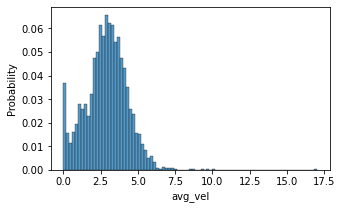

In [ ]:
factor = 'avg_vel'
data_multi = df_varfs[df_varfs.sceneId.apply(lambda x: x in list_scene) & (df_varfs.label == 'Biker')]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(data_multi, x=factor, stat='probability', binwidth=0.2)

<AxesSubplot:xlabel='avg_vel', ylabel='Probability'>

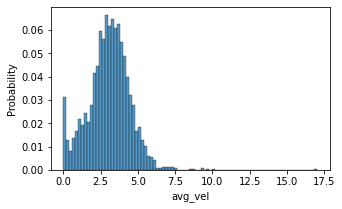

In [ ]:
# select scenes 
list_scene_easy = ['deathCircle_0', 'deathCircle_1', 'deathCircle_3', 'gates_1', \
    'gates_3', 'gates_4', 'little_0', 'little_3']

# load data
df_multi_easy = pd.DataFrame() 
for scene_id in list_scene_easy:
    df_multi_easy = pd.concat([df_multi_easy, pd.read_pickle(f'{data_dir}/{scene_id}/Biker.pkl')], axis=0)

# save data 
df_multi_easy.to_pickle('../data/sdd/filter/agent_type/multi_easy/Biker.pkl')

# plot distribution 
factor = 'avg_vel'
data_multi_easy = df_varfs[df_varfs.sceneId.apply(lambda x: x in list_scene_easy) & (df_varfs.label == 'Biker')]
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
sns.histplot(data_multi_easy, x=factor, stat='probability', binwidth=0.2)
